### Predicting heart disesase using machine learning 

Problem statement : Classify whether a patient has a heart disease based on their medial reports attributes 

Approach to the problem statement:
1. Problem Definition 
2. Data 
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation


#### 1) Problem Definition
> Given the patients medical details calssify whether patient has heart disease?

#### 2) Data 
> Collect the data from various sources as this is a personal project we could use a open source dataset for heart disease.
(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

#### 3) Evaluation 
> If we are able to get a accuracy of more than 95% we can further pursue the model and make it better.

#### 4) Features 
> These are all the features on which we are going to identify if our patient has any heart disease?
(Note : Not all the features are necessary so you also need to learn what features could play vital role in your model making good predictions and remove those which will not help you)
	
    * age
	* sex
	* chest pain type (4 values)
	* resting blood pressure
	* serum cholestoral in mg/dl
	* fasting blood sugar > 120 mg/dl
	* resting electrocardiographic results (values 0,1,2)
	* maximum heart rate achieved
	* exercise induced angina
	* oldpeak = ST depression induced by exercise relative to rest
	* the slope of the peak exercise ST segment
	* number of major vessels (0-3) colored by flourosopy
	* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


In [1]:
# import all the tools that we could need 

%matplotlib inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import all the models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

# Importing all the evaluation tools 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score
from sklearn.metrics import roc_curve, RocCurveDisplay,roc_auc_score

 

### Loading the data 


In [2]:
heart = pd.read_csv('data/heart-disease.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart.shape, heart.isna().sum()

((303, 14),
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

## Data Exploration (exploratory data analysis or EDA)
Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well `(overfitting)` or why they might be performing poorly `(underfitting)`.

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

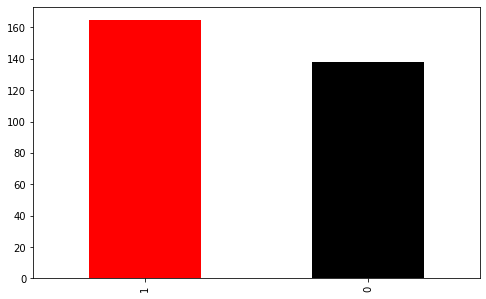

In [6]:
heart['target'].value_counts().plot(kind='bar', color=['Red', 'black'], figsize=(8,5));

##### what we are tring to do here is get the intuition on our data like what sex poeple have more heart disease.
##### we can observe below that the women have 75% probability of heart disease
##### while men have 50% probability

> target 0 - no heart disease

> target 1 - heart disease

> sex 0 - men 

> sex 1 - women

In [7]:
pd.crosstab(heart.sex, heart.target)

target,0,1
sex,,
0,24,72
1,114,93


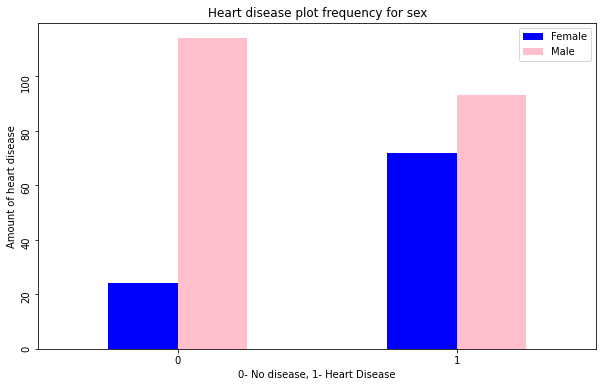

In [8]:
pd.crosstab(heart.target, heart.sex).plot(kind='bar',figsize=(10,6),color =['Blue', "pink"]);


plt.title('Heart disease plot frequency for sex');
plt.xlabel('0- No disease, 1- Heart Disease');
plt.ylabel('Amount of heart disease');
plt.legend(['Female','Male']);
plt.xticks(rotation=0);
plt.yticks(rotation=90);

In [9]:
pd.crosstab(heart.fbs, heart.target)

target,0,1
fbs,,
0,116,142
1,22,23


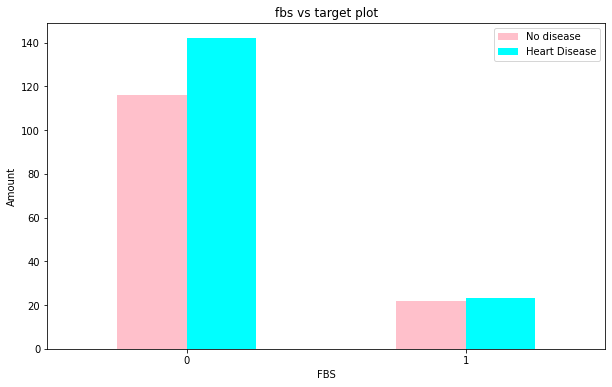

In [10]:
pd.crosstab(heart.fbs, heart.target).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['Pink', 'Cyan']);

plt.title('fbs vs target plot');
plt.xlabel('FBS');
plt.ylabel('Amount');
plt.xticks(rotation=0);
plt.legend(['No disease',"Heart Disease"]);

### Age vs Max. heart rate for heart disease

In [11]:
heart['thalach'].value_counts()
# length 91 means there are 91 diffrnet values 

# as there are 91 different values we cant use bar graph so we should use scatter plot 

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

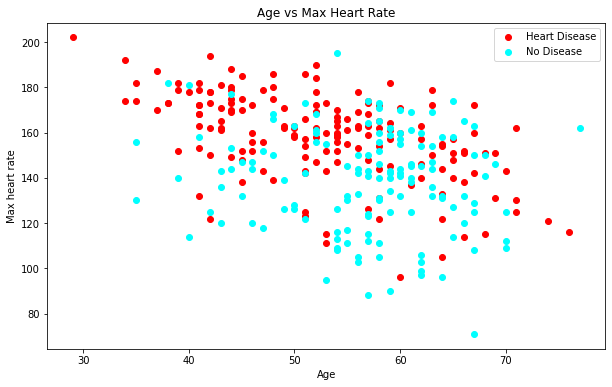

In [12]:
#create a figure 
plt.figure(figsize=(10,6))

# Scatter with positives values first 
plt.scatter(heart.age[heart.target==1],
           heart.thalach[heart.target==1],
           c=['red'])

# Scatter with negative values 
plt.scatter(heart.age[heart.target==0],
           heart.thalach[heart.target==0],
           c='cyan')

# Communicate with plot 
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel("Max heart rate")
plt.legend(['Heart Disease', 'No Disease']);

In [13]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart.cp.value_counts()

# taking all the different counts in the chest pain type 

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [15]:
pd.crosstab(heart.cp, heart.target)

# as there are only 4 distinct values we can use bar graph again

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


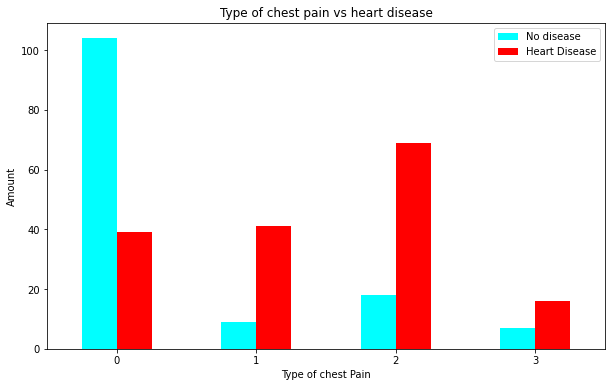

In [16]:
pd.crosstab(heart.cp, heart.target).plot(kind='bar',
                                        figsize=(10,6),
                                        color=['Cyan', "red"])

plt.title('Type of chest pain vs heart disease')
plt.xlabel('Type of chest Pain')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['No disease','Heart Disease']);

### Making a correlation matrix 

In [17]:
heart.corr()

# corr is used to make a correlation matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


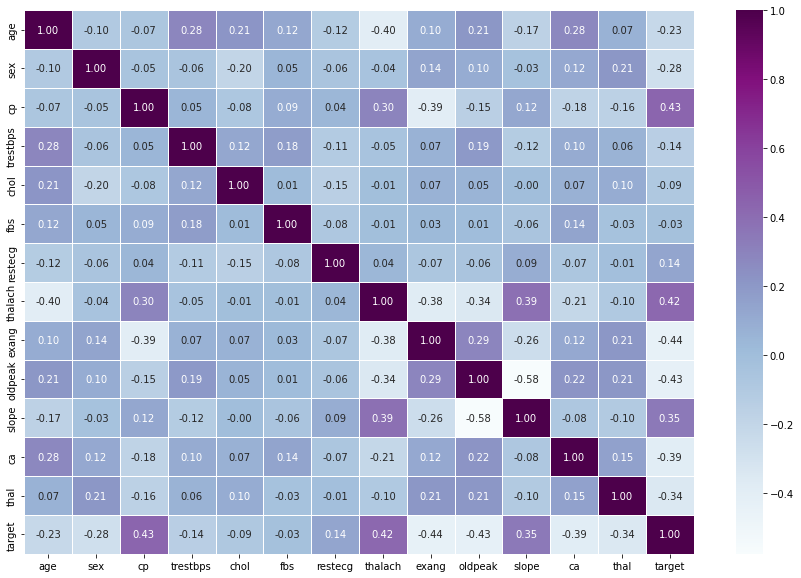

In [18]:
cor_matrix = heart.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(cor_matrix,
                annot=True,
                linewidths=.5,
                fmt='.2f',
                cmap='BuPu')


# positive correlation means when the value of one goes up the value of the classification data also increase
# negative coorelation means when the value of one attribute goes down the value of classification data increases


# Note:

> If correlation value is bw `0.9 to 1` or `-0.9 to -1` - That means they have `Perfect correlation`

> If correlation value is bw `0.5 to 0.9` or `-0.5 to -0.9` - That means they have `Strong correlation`

> If correlation value is bw `0.1 to 0.5` or `-0.1 to -0.5` - That means they have `Weak correlation`

> If correlation value is bw `0 to 0.1` or `0 to -0.1` - That means they are `Uncorrelated`

In [19]:
# Getting the data ready 

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
np.random.seed(42)

X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(y_train)

(242, 242)

**Now we have got our data split into train and test split, we will build ML model next**

**We will train and find patterns in training set**

**And we will test the model on the testing set**

In [21]:
# we will be trying 3 diffrent models in this project for calssification

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier()
}

# we have initialized a dictionary with all the models w are going to use in this problem

def fit_evaluate (models, X_train, X_test, y_train, y_test):
    """
    This function will fit different models and also evaluate their scores
    """
    model_score={}
    for name, model in models.items(): #looping through models dictionary to get name and the model
        #fit
        model.fit(X_train, y_train) # basically training the model here 
        # evaluate 
        model_score[name] = model.score(X_test, y_test) #will pass key as name and value as models score
     
    return model_score
        

In [22]:
fit_evaluate(models,X_train,X_test, y_train, y_test)

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

In [23]:
model_compare = pd.DataFrame(fit_evaluate(models,X_train,X_test,y_train,y_test), index = ['Accuracy'])


model_compare, model_compare.T

#When we want the dataframe in actual datset format we have to transpose it after we convert it from dictionary to a dataFrame

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(          Logistic Regression       KNN  Random Forest
 Accuracy             0.885246  0.688525       0.868852,
                      Accuracy
 Logistic Regression  0.885246
 KNN                  0.688525
 Random Forest        0.868852)

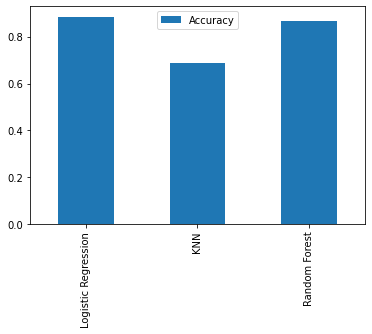

In [24]:
model_compare.T.plot(kind='bar');

**We have got the baseline model scores for all the three models and now we will be doinh hyperparameter tuning to see and improve the scores of the models if we can.**

**Classification model's score judging parameters**
* Hyperparamater Tuning 
* Feature importance
* Confusion Matrix 
* Cross val score
* Precision Score 
* Recall Score 
* F1 score
* Classification report 
* Roc curve
* Area under curve


### Lets look at `Hyperparameter Tuning`

In [25]:
# first we will experiment on knn

train_score = []
test_score = []

neighbors = range(1,21)
for i in range (1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_score.append(knn.score(X_train,y_train))
    
    test_score.append(knn.score(X_test, y_test))
    
#train_score, test_score

The highest score for KNN is: 75.41%


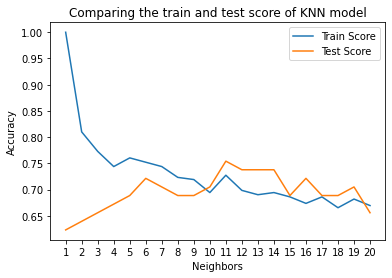

In [26]:
plt.plot(neighbors, train_score)
plt.plot(neighbors, test_score)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title("Comparing the train and test score of KNN model")
plt.xticks(np.arange(1,21,1))
plt.legend(['Train Score', 'Test Score']);


print(f"The highest score for KNN is: {max(test_score)*100:.2f}%")


#### Hyperparameter tuning with RandomizedSearchCV

We will tune 
* Logistic Regression 
* RandomForestClassifier

In [27]:
# create a hyperparameter grid for logistic regression

log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Create hyperparameter grid for randomforestclassfier

rf_grid = {'n_estimators': np.arange(10,1000,50),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [28]:
# Tune logistic regression 
np.random.seed(32)

#setup random hyperparameter for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               verbose=True,
                               n_iter = 20)


# fit the hyperparameters

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
# evaluate 

rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [31]:
# setup the randomisedsearchcv for RandomForestClassifier
np.random.seed(31)

rs_rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

rs_rf_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [32]:
# evaluate 

rs_rf_clf.score(X_test, y_test)

0.8688524590163934

In [33]:
rs_rf_clf.best_params_

{'n_estimators': 460,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_depth': 5}

# Hyper parameter tuning using GridSearchCV

As we can see that the LogisticRegression model provides the best result for out data we will be performing GridSeachCV on it and then try to improve it

In [34]:
# Creating grids for GridSearchCv

lr_grid = {'C': np.logspace(-4,4,30),
          'solver':['liblinear']}

#setting up grid for logistic regression

gscv = GridSearchCV(LogisticRegression(),
                   param_grid=lr_grid,
                   cv=5,
                   verbose=True)

# Fit the new gridsearchcv model 
gscv.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [35]:
gscv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gscv.score(X_test, y_test)

0.8852459016393442

# Evaluating our tuned machine learning classifier beyond accuracy 

* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision
* Recall 
* F1- score 
* cross val score 

In [37]:
y_preds = gscv.predict(X_test)

y_preds

y_proba = gscv.predict_proba(X_test)
#y_proba

y_score = y_proba[:,1]

0.9245689655172414


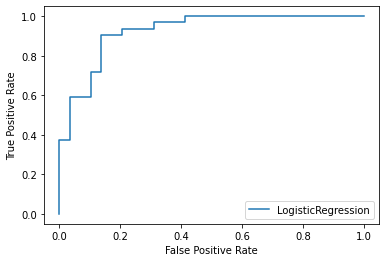

In [38]:
fpr, tpr, threshold = roc_curve(y_test, y_score)

best_model = gscv.best_estimator_

roc_display = RocCurveDisplay(estimator_name=str(best_model.__class__.__name__), fpr=fpr, tpr=tpr)

roc_display.plot();

print(roc_auc_score(y_test,y_score))

In [39]:
con_mat = confusion_matrix(y_test, y_preds)
con_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

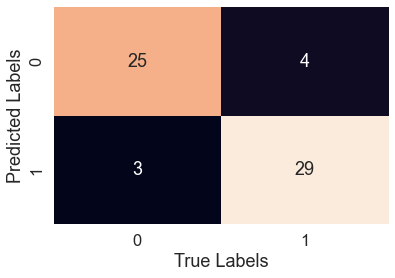

In [40]:
sns.set(font_scale=1.5)

def plot_con_mat(y_test, y_preds):
    con_mat = confusion_matrix(y_test, y_preds)
    sns.heatmap(con_mat,
           annot=True,
           cbar=False);
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels');
    

plot_con_mat(y_test, y_preds)

In [41]:
# ROC curve, confusion matrix and AUC score are all done so remaining are F1-score(), Precision Score(), Recall Score() 
# and classification report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Finding classification Report using Cross validation




We are going to calculate all the evaluation like Precision, Recall etc using Cross Validation using the `cross_val_score()`

In [42]:
# First intialize our logisticregression with best parameters 

clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8852459016393442

In [43]:
# Cross val score for accuracy 

cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5)

cv_acc = np.mean(cv_acc)

In [44]:
# Cross val score using precision

cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='precision')

cv_precision = np.mean(cv_precision)

In [45]:
# Cross val score using recall

cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='recall')

cv_recall = np.mean(cv_recall)

In [46]:
# Cross val score using f1-score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='f1')

cv_f1 = np.mean(cv_f1)

In [47]:
score = pd.DataFrame({'Accuracy':cv_acc,
                     'Precision':cv_precision,
                     'Recall':cv_recall,
                     'F1':cv_f1},
                    index=[0])
score

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


In [48]:
score.T

,0
Accuracy,0.847978
Precision,0.821587
Recall,0.927273
F1,0.870540


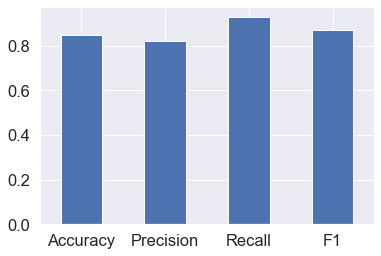

In [49]:
score.T.plot(kind='bar', legend=False);
plt.xticks(rotation=0);

## Feature importance 

Featur importance : which features contributed most to the outcome of our model and how did they contribute?

Different Models have different way of finding feature iportance: One way to din feature importance is 'Model name feature importance'

Now as we are moving ahead with logistic regression we will find feature importance of that 


In [50]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')

clf.fit(X_train, y_train)


LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [52]:
#check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [53]:
feature_dict = dict(zip(heart.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

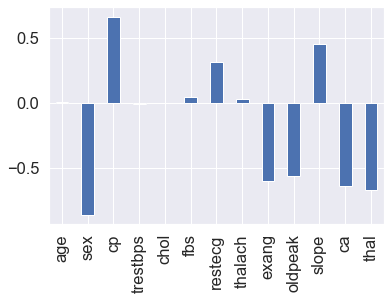

In [54]:
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(legend=False);